# Analyse nodes

In [1]:
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [2]:
import sys
import os
from pathlib import Path
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


sys.path.append(str(Path(os.path.abspath("")).parent))

from dataset import get_data_loader

In [3]:
import sys, os
from pathlib import Path

sys.path.append(str(Path(os.path.abspath("")).parent))

In [4]:
# ID_FILE = '../id_files/dev_100.txt'
# ID_FILE = '../id_files/validation.txt'
ID_FILE = "../id_files/deepmath.txt"

In [5]:
data = TorchLoadDataset(ID_FILE)
data

TorchLoadDataset(32524)

## Number of nodes per problem

In [6]:
node_counts = [len(d.x) for d in data]

In [7]:
print(f"Max number of nodes:", max(node_counts))
print(f"Min number of nodes:", min(node_counts))
print(f"Avg number of nodes: {np.mean(node_counts):.2f}")

Max number of nodes: 12072
Min number of nodes: 8
Avg number of nodes: 742.37


<AxesSubplot: ylabel='Count'>

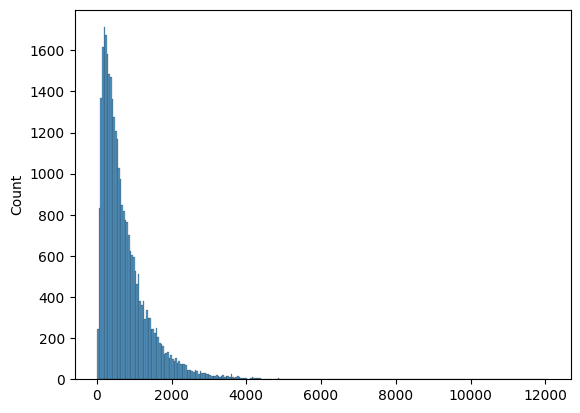

In [8]:
sns.histplot(node_counts)

## Number of axioms per problem

In [9]:
axiom_counts = [len(d.y) for d in data]

In [10]:
print(f"Max number of axioms: {max(axiom_counts)}")
print(f"Min number of axioms: {min(axiom_counts)}")
print(f"Avg number of axioms: {np.mean(axiom_counts):.2f}")

Max number of axioms: 270
Min number of axioms: 2
Avg number of axioms: 16.07


<AxesSubplot: ylabel='Count'>

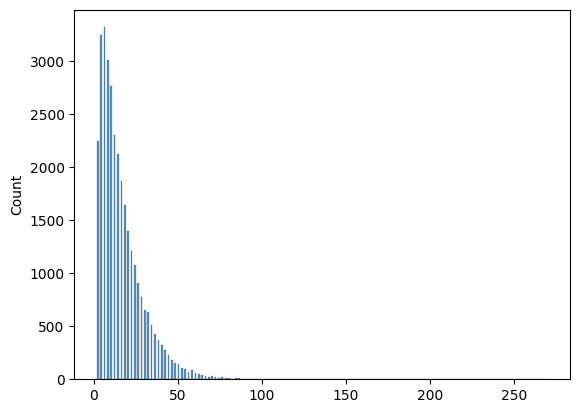

In [11]:
sns.histplot(axiom_counts)

# Ratio of axiom nodes over all nodes

In [12]:
axiom_ratio = np.divide(axiom_counts, node_counts)

In [13]:
print(f"Max ratio: {max(axiom_ratio):.3f}")
print(f"Min ratio: {min(axiom_ratio):.3f}")
print(f"Avg ratio: {np.mean(axiom_ratio):.3f}")

Max ratio: 0.250
Min ratio: 0.002
Avg ratio: 0.026


# Plot Node distribution

In [14]:
from config import NODE_TYPE

In [16]:
nodes_list = []
for d in data:
    nodes_list.extend(d.x.tolist())

c = Counter(nodes_list)
del nodes_list

In [18]:
pie_data = []
pie_labels = []
for i, n_type in NODE_TYPE.items():

    if i in c:
        pie_data.append(c[i])
        pie_labels.append(n_type)

In [19]:
plt.pie(pie_data, labels = NODE_TYPE.keys(), colors = colors, autopct='%.0f%%')


NameError: name 'colors' is not defined

In [24]:
patches

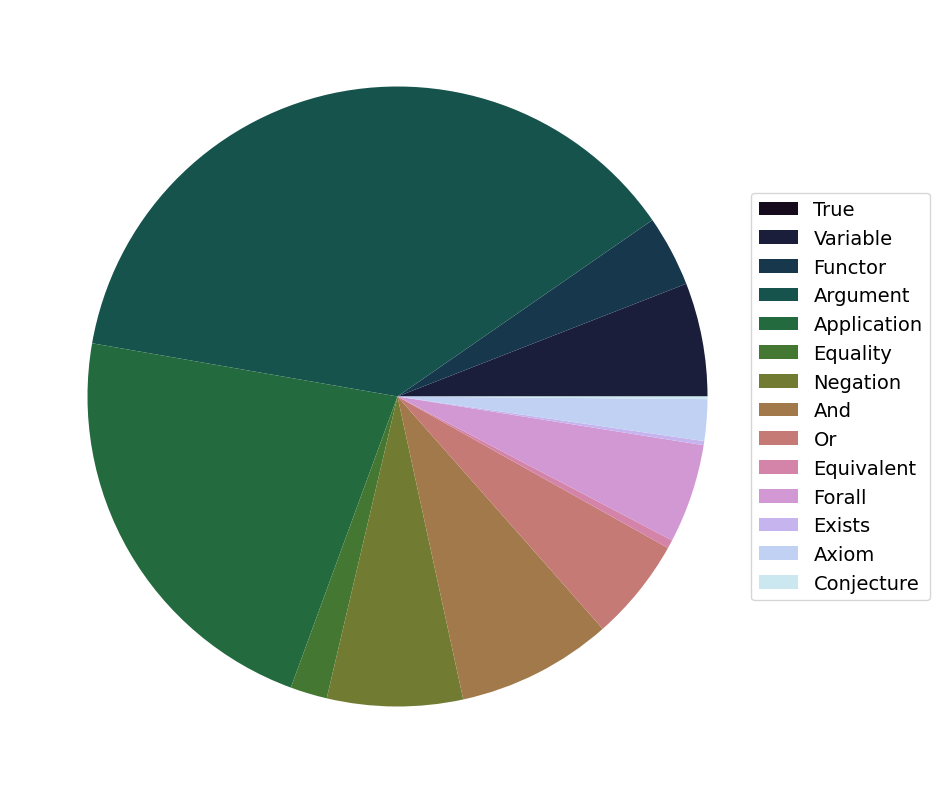

In [92]:
# colors = sns.color_palette('pastel', len(NODE_TYPE))
# colors = sns.color_palette("viridis", len(NODE_TYPE))
#colors = sns.color_palette(palette=None, n_colors=len(NODE_TYPE))
colors = sns.color_palette('cubehelix', n_colors=len(NODE_TYPE))
#colors.sort()

plt.rcParams["figure.figsize"] = (10, 12)
# plt.pie(pie_data , labels= pie_label, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
# patches, texts, ratios = plt.pie(pie_data, colors = colors, autopct='%.0f%%')
patches, texts = plt.pie(pie_data, colors=colors)
#patches, texts = plt.pie(pie_data)


# patches, texts = plt.pie(pie_data, colors = colors) #, autopct='%.0f%%', textprops={'fontsize': 16})


plt.legend(patches, pie_labels, loc="right", fontsize=14, bbox_to_anchor=(1.2, 0.5))

# plt.tight_layout()

plt.show()

The argument node takes a surprising amount of space.
For all problems, this is as much as 38% of the nodes

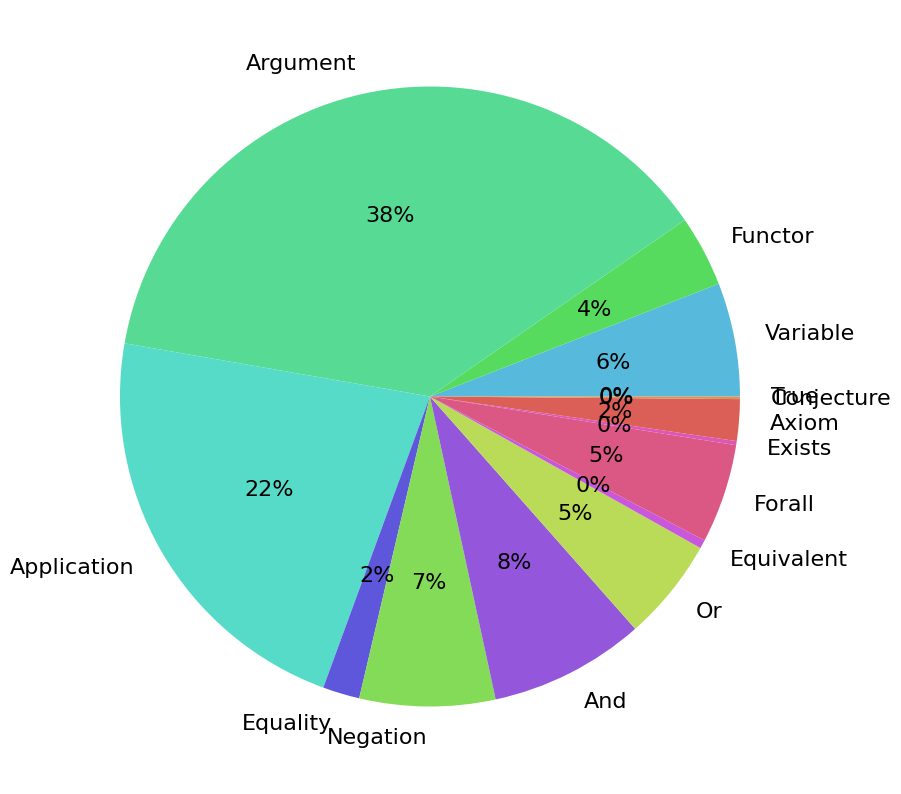

In [58]:
_ = plt.pie(pie_data, labels=pie_labels, colors=colors, autopct="%.0f%%", textprops={"fontsize": 16})

In [47]:
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

TypeError: 'ListedColormap' object is not iterable

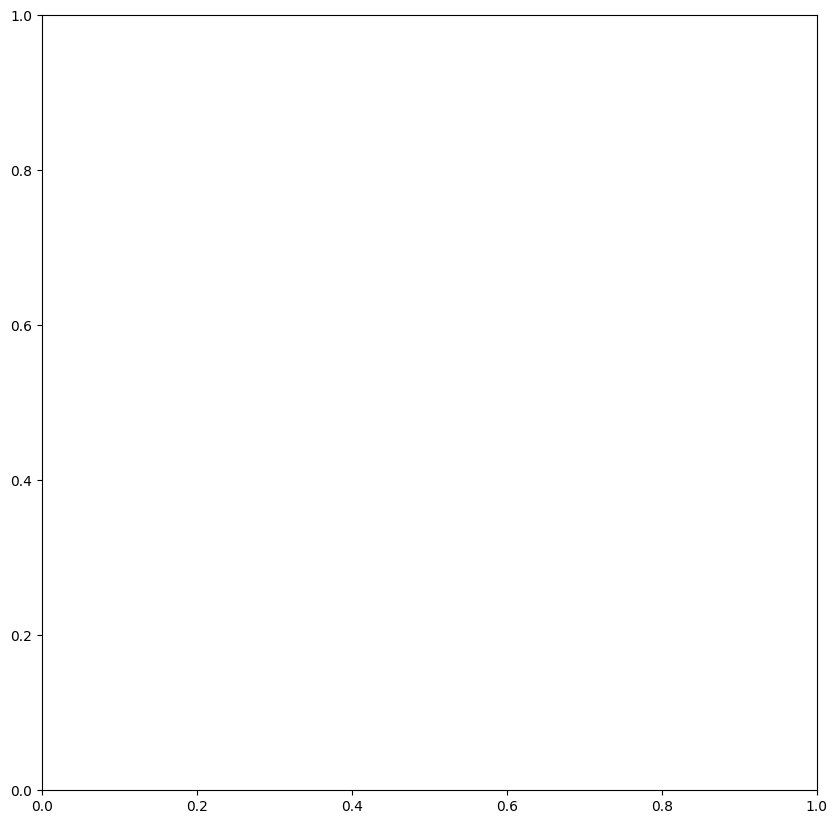

In [77]:
# colors = sns.color_palette('pastel', len(NODE_TYPE))
# colors = sns.color_palette("viridis", len(NODE_TYPE))
colors = sns.color_palette('hls', n_colors=len(NODE_TYPE), as_cmap=True)

plt.rcParams["figure.figsize"] = (10, 12)
# plt.pie(pie_data , labels= pie_label, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
# patches, texts, ratios = plt.pie(pie_data, colors = colors, autopct='%.0f%%')

#patches, texts = plt.pie(pie_data, labels=pie_labels, colors=colors)

pie = plt.pie(pie_data, colors=colors)

# patches, texts = plt.pie(pie_data, colors = colors) #, autopct='%.0f%%', textprops={'fontsize': 16})


#plt.legend(patches, pie_labels, loc="right", fontsize=14, bbox_to_anchor=(1.3, 0.5))

# plt.tight_layout()

plt.legend(pie[0],pie_labels, bbox_to_anchor=(1.05,.5), fontsize=14, loc="center right", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

In [51]:

colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5791999999999999, 0.33999999999999997),
 (0.86, 0.7872, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5167999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7872000000000001),
 (0.33999999999999997, 0.7247999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5791999999999999, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7247999999999996),
 (0.86, 0.33999999999999997, 0.5167999999999995)]

In [72]:
colors = sns.color_palette('hls', n_colors=len(NODE_TYPE))
colors.sort()
colors

[(0.33999999999999997, 0.5167999999999999, 0.86),
 (0.33999999999999997, 0.7247999999999999, 0.86),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7872000000000001),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5167999999999999, 0.86, 0.33999999999999997),
 (0.5791999999999999, 0.33999999999999997, 0.86),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.5167999999999995),
 (0.86, 0.33999999999999997, 0.7247999999999996),
 (0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5791999999999999, 0.33999999999999997),
 (0.86, 0.7872, 0.33999999999999997)]

In [52]:
colors = sns.color_palette('hls', n_colors=len(NODE_TYPE))


In [56]:
colors.sort()

In [57]:
colors

[(0.33999999999999997, 0.5167999999999999, 0.86),
 (0.33999999999999997, 0.7247999999999999, 0.86),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7872000000000001),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5167999999999999, 0.86, 0.33999999999999997),
 (0.5791999999999999, 0.33999999999999997, 0.86),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.5167999999999995),
 (0.86, 0.33999999999999997, 0.7247999999999996),
 (0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5791999999999999, 0.33999999999999997),
 (0.86, 0.7872, 0.33999999999999997)]